# About

This notebook is made for pre-processing of the data for better interactivity on the main display. The processed data would be stored in separate folder and used by the `index.html` for visualizations.

# Loading the data

In [49]:
import geopandas as gpd
import pandas as pd
import numpy as np

from shapely.geometry import Point, LineString, Polygon

Loading meta dataset

In [10]:
meta_df = pd.read_csv("data/south_orkneys_chinstrap_tdr_gps_metadata.csv")
meta_df.head()

,Dep_ID,Location,Species,Date_deployed,Time_deployed,Date_retreived,Time_retreived,GPS,TDR,Bill_length [mm],Bill_depth [mm],Weight_deployment [kg],Weight_return [kg],Sex,Stage [a],Nest_on_dep [b],Nest_on_return,Notes,Nest_lat [deg N],Nest_lon [deg E]
0,SIC001,"South Orkneys, Signy Island",Chinstrap penguin,29/12/2011,1400,01/01/2012,1757,NaN,A08267,50.2,NaN,4.40,4.50,NaN,Incubation,NaN,NaN,GPS tags didn't work,NaN,NaN
1,SIC002,"South Orkneys, Signy Island",Chinstrap penguin,29/12/2011,1500,01/01/2012,1757,NaN,A08265,47.3,NaN,3.80,4.50,NaN,Incubation,NaN,NaN,GPS tags didn't work,NaN,NaN
2,SIC003,"South Orkneys, Signy Island",Chinstrap penguin,29/12/2011,1700,01/01/2012,1812,NaN,A08262,45.4,NaN,3.50,3.20,NaN,Incubation,NaN,NaN,GPS tags didn't work,NaN,NaN
3,SIC004,"South Orkneys, Signy Island",Chinstrap penguin,30/12/2011,1418,01/01/2012,1345,NaN,A08264,54.6,NaN,4.10,4.15,NaN,Incubation,NaN,NaN,No TDR,NaN,NaN
4,SIC005,"South Orkneys, Signy Island",Chinstrap penguin,30/12/2011,1441,02/01/2012,1520,29309,NaN,46.5,NaN,4.15,4.20,NaN,Incubation,NaN,NaN,TDR failed,NaN,NaN


Loading individuals datasets.

In [11]:
# Selecting all the gps .csv files rfom the dataset
import os

CSV_arr = [] # Array that holds the csv files

for subdir, dirs, files in os.walk("data"):
    for file in files:
        if file[-4:] == ".csv": # Filtering by csv files only
            # print(os.path.join(subdir, file)) # debug line 
            CSV_arr.append(os.path.join(subdir, file))

# removing the metadata file
CSV_arr.pop(0)
#CSV_arr # Printing out to see if they are loaded 

'data/south_orkneys_chinstrap_tdr_gps_metadata.csv'

The next cell limits the amount of individuals to be processed. For testing purposes only.

In [12]:

# import random

# sample_size = 100

# CSV_arr = random.sample(CSV_arr, sample_size)

# print(CSV_arr)

Converting coordinate pairs into geographic points for each table. I keep them separate here because I need to corelate them into the "meta" dataset.

In [13]:
id_arr = [] # Arraty that holds all ids that we work thru # Used later, when filtering the dataset
subj_gdf_arr = [] # array with subject/penguins gdf's

#for subject in iter(GPS_df_dict):
for file in CSV_arr:

    id = file[9:15] # Assuming the filename is in format "data/LIC/LIC058_29497_0090_GPS.csv"
    # Because PIC are not properly standard
    if id[:2] == "PI":
        id = id[:2] + "C" + id[2:-1]

    temp_df = pd.read_csv(file)

    # Need to check if the read dataset is empty, because apperently "cleaned" dataset isn't clean at all
    if temp_df.empty:
        continue # Skipping if the table is empty

    # In some of the cases DEP_ID is absent from the dataset, so we need to add it
    id_arr.append(id)
    if 'DEP_ID' not in temp_df:
        temp_df['DEP_ID'] = id

    geometry = [Point(xy) for xy in zip(temp_df.Latitude_degrees_north, temp_df.Longitude_degrees_east)]
    temp_gdf = gpd.GeoDataFrame(temp_df, geometry=geometry, crs='EPSG:4326') 
    
    subj_gdf_arr.append(temp_gdf)

# Some debug output to make sure it works
print(type(subj_gdf_arr[0]))
print(subj_gdf_arr[0])

<class 'geopandas.geodataframe.GeoDataFrame'>
                 DateTime  Latitude_degrees_north  Longitude_degrees_east  \
0     2011-12-30 14:38:18              -60.708653              -45.596509   
1     2011-12-30 14:40:18              -60.709421              -45.599059   
2     2011-12-30 14:44:18              -60.709942              -45.599263   
3     2011-12-30 14:48:18              -60.710249              -45.599437   
4     2011-12-30 14:50:18              -60.712477              -45.603778   
...                   ...                     ...                     ...   
1250  2012-01-01 13:12:12              -60.746436              -45.565954   
1251  2012-01-01 13:14:32              -60.746159              -45.564907   
1252  2012-01-01 13:19:19              -60.746822              -45.566002   
1253  2012-01-01 13:40:19              -60.730532              -45.586594   
1254  2012-01-01 13:44:19              -60.730676              -45.586385   

      DEP_ID                 

Making the all-together dataset right-away since I'll need this one later.

In [14]:
# Creating the total df of all specimen movements
GPS_gdf = pd.concat(subj_gdf_arr)
GPS_gdf.head()

,DateTime,Latitude_degrees_north,Longitude_degrees_east,DEP_ID,geometry
0,2011-12-30 14:38:18,-60.708653,-45.596509,SIC004,POINT (-60.70865 -45.59651)
1,2011-12-30 14:40:18,-60.709421,-45.599059,SIC004,POINT (-60.70942 -45.59906)
2,2011-12-30 14:44:18,-60.709942,-45.599263,SIC004,POINT (-60.70994 -45.59926)
3,2011-12-30 14:48:18,-60.710249,-45.599437,SIC004,POINT (-60.71025 -45.59944)
4,2011-12-30 14:50:18,-60.712477,-45.603778,SIC004,POINT (-60.71248 -45.60378)


Next, selecting only needed entrees from the randomly chosen sample and adding the line calculation. The latter technically belongs in the next sub-section, but it's convenient to do it in one place. The algorithm is not the fastest, but because some of the entrees (for some reason) have the same identifier inside the table, it's important to catch duplicates. I will ignore the miss-fits since I have no idea to which DEP_ID they would belong.

In [15]:
# Filtering the main dataframe nased on what subjects we have
selected_df = meta_df[meta_df['Dep_ID'].isin(id_arr)]
# Adding the geometry to all of the entrees
seen = []
geometry = []
for id in selected_df['Dep_ID']: #FIXME: I'm doing it with O(infinity) algorithm, but whatewer, it can be redone later on 
    for df in subj_gdf_arr:
        if df['DEP_ID'].iloc[0] == id and id not in seen: # and id in meta_df['Dep_ID'] and df['DEP_ID'].iloc[0] in meta_df['Dep_ID']:
            seen.append(id)
            geometry.append(LineString(df['geometry']))


selected_df = gpd.GeoDataFrame(selected_df, geometry=geometry, crs='EPSG:4326', )

# Verifying if it's in-place
selected_df['geometry'].head()

3    LINESTRING (-60.70865 -45.59651, -60.70942 -45...
4    LINESTRING (-60.71018 -45.59944, -60.71159 -45...
5    LINESTRING (-60.72878 -45.58625, -60.72986 -45...
6    LINESTRING (-60.72913 -45.58566, -60.73048 -45...
7    LINESTRING (-60.73051 -45.58766, -60.73074 -45...
Name: geometry, dtype: geometry

# Adding features

In [16]:
# Creating path length feature (in meters)
selected_df['path_len'] = selected_df.to_crs('EPSG:3031')['geometry'].length # Using WGS 84 / Antarctic Polar Stereographic
selected_df['path_len'].describe()

count    3.080000e+02
mean     4.600348e+05
std      4.524093e+05
min      5.631064e+02
25%      1.697015e+05
50%      2.951944e+05
75%      5.859727e+05
max      2.580660e+06
Name: path_len, dtype: float64

Creating the sore feature for each specimen

In [17]:
import re # needed to reformat string values to numeric

# Function to assign numeric score
def calc_cell_score(cell):
    if pd.isna(cell):
        return 0
    text = cell.strip()
    # Normalize formatting
    text = re.sub(r'\s*-\s*', '-', text)
    text = text.replace(';', ',')
    parts = [p.strip() for p in text.split(',') if p.strip()]
    
    score = 0
    for part in parts:
        # Extract category and number if any
        m = re.match(r'([A-Za-z]+)\s*[-]*\s*(\d*)', part)
        if not m:
            continue
        category = m.group(1).lower()
        num = int(m.group(2)) if m.group(2).isdigit() else 1
        
        if category == 'eggs':
            score += num * 1
        elif category == 'chicks':
            score += num * 2
        elif category == 'creche':
            score += 2
        else:
            score += 0
    return score

selected_df["score"] = selected_df["Nest_on_dep [b]"].apply(calc_cell_score) + selected_df["Nest_on_return"].apply(calc_cell_score)

# Vrifying the result
selected_df["score"].describe()

count    308.000000
mean       4.941558
std        2.535062
min        0.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: score, dtype: float64

In [18]:
# Creating class for each specimenon theurr breeding success

# Function that classifies success. Can be re-defined later!
def success_class(row):
    if 'Chicks' in str(row["Nest_on_dep [b]"]) or 'Chicks' in str(row["Nest_on_return"]) or 'Creche' in str(row["Nest_on_dep [b]"]) or 'Creche' in str(row["Nest_on_return"]):
        return "Success"
    if 'Failed' in str(row["Nest_on_dep [b]"]) or 'Failed' in str(row["Nest_on_return"]):
        return "Fail"
    if 'Eggs' in str(row["Nest_on_dep [b]"]) or 'Eggs' in str(row["Nest_on_return"]):
        return "Eggs"
    else: # in case there is some weird case I don't feel like dealing with
        return np.nan

selected_df['season_success'] = selected_df.apply(lambda row: success_class(row), axis=1)

# See what unique values there are
selected_df['season_success'].drop_duplicates()

3          NaN
19        Eggs
27     Success
205       Fail
Name: season_success, dtype: object

Renaming columns since Altair does not understand spaces in names of features.

In [19]:
selected_df = selected_df.rename(columns={
    "Weight_deployment [kg]": 'Weight_deployment',
    'Weight_return [kg]': 'Weight_return',
    'Bill_length [mm]': 'Bill_length',
    'Bill_depth [mm]': "Bill_depth"
    })
selected_df.columns

Index(['Dep_ID', 'Location', 'Species', 'Date_deployed', 'Time_deployed',
       'Date_retreived', 'Time_retreived', 'GPS', 'TDR', 'Bill_length',
       'Bill_depth', 'Weight_deployment', 'Weight_return', 'Sex', 'Stage [a]',
       'Nest_on_dep [b]', 'Nest_on_return', 'Notes', 'Nest_lat [deg N]',
       'Nest_lon [deg E]', 'geometry', 'path_len', 'score', 'season_success'],
      dtype='object')

Converting time to actual `datetime`.


In [36]:
selected_df['date'] = pd.to_datetime(selected_df['Date_deployed'], dayfirst=True, errors='coerce')

Loading the geojson and removing everything that is out of bounds.

In [42]:
minx, miny, maxx, maxy = GPS_gdf.total_bounds

pol = Polygon([
    (minx+0.05, miny+0.05),  # bottom-left
    (minx+0.05, maxy+0.05),  # top-left
    (maxx+0.05, maxy+0.05),  # top-right
    (maxx+0.05, miny+0.05),  # bottom-right
    (minx+0.05, miny+0.05)   # close the polygon
])

In [43]:
# Antarctica CRS
gdf = gpd.read_file('custom.geo.json', mask=pol)
gdf = gdf.to_crs(epsg=4326)

<Axes: >

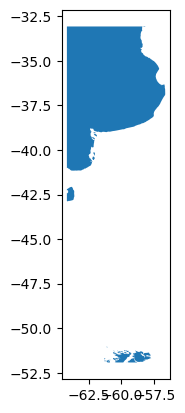

In [44]:
poly_gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[pol])
bounded_gdf = gpd.clip(gdf, poly_gdf)
bounded_gdf.plot()

Saving the bounded islands for future use.

In [45]:
bounded_gdf.to_file("SOI_bounded.geo.json", driver="GeoJSON")

Filtering out entrees that intersect with islands to get actual travels.

In [ ]:
GPS_gdf = GPS_gdf[~GPS_gdf.intersects(bounded_gdf)]


/tmp/ipykernel_125367/3081013211.py:1: UserWarning: The indices of the left and right GeoSeries' are not equal, and therefore they will be aligned (reordering and/or introducing missing values) before executing the operation. If this alignment is the desired behaviour, you can silence this warning by passing 'align=True'. If you don't want alignment and protect yourself of accidentally aligning, you can pass 'align=False'.
  GPS_gdf = GPS_gdf[~GPS_gdf.intersects(bounded_gdf)]
/home/dm/miniconda3/envs/CS424/lib/python3.9/site-packages/geopandas/geodataframe.py:1750: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()


# Cleaning the data

In [27]:
# Transforming neeters into kilometers, sonce the persision is unnessesary and it seems to cause clutter
selected_df['path_len'] = selected_df['path_len'].apply(lambda x: x/1000)

In [28]:
# Removing rows with distance traveled more than 1200 km, since they seem to be outliets and overall, improbable
selected_df = selected_df[selected_df['path_len'] < 1200]

# Exporting processed data

In [29]:
selected_df.to_csv("processed_data/meta.csv")

In [30]:
GPS_gdf.to_csv('processed_data/GPS.csv')